# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
#Combine the dataframe using the join column. based on the above info it will be city. as we want all data from ride data 
# We will merge ride data left join with city data to ensure we get all daily data from ride data.
# note that if there is a city data with missing ride data then it will be missing in the merged data.
#in addition as ride data is more graular, city data will duplicated for each ride daily data for the city.
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
by_type_ride_counts = pyber_data_df.groupby(["type"]).count()["ride_id"]
by_type_ride_counts

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
# 2. Get the total drivers for each city type,
# either use group by on city data and sum driver counts, or group by on pyber data on use mean on driver count.
by_type_driver_counts = city_data_df.groupby(["type"]).sum()["driver_count"]
by_type_driver_counts                            

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
#  3. Get the total amount of fares for each city type
by_type_total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
by_type_total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [15]:
#  4. Get the average fare per ride for each city type. 
by_type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
by_type_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [13]:
# 5. Get the average fare per driver for each city type. 
by_type_fare_per_driver = by_type_total_fare/by_type_driver_counts
by_type_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [39]:
#  6. Create a PyBer summary DataFrame
pyber_summary_df = pd.DataFrame(
                    {"Total Rides": by_type_ride_counts,
                     "Total Drivers": by_type_driver_counts,
                     "Total Fares": by_type_total_fare,
                     "Average Fare per Ride" : by_type_avg_fare,
                     "Average Fare per Driver": by_type_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [40]:
#check summary data frame index
pyber_summary_df.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

In [41]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
#Check the index name again. it should be nothing.
pyber_summary_df.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object')

In [42]:
# example for formating from previous modeul to remind . 
#math_scores_by_grade["9th"] = math_scores_by_grade["9th"].map("{:.1f}".format)
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [47]:
# 1. Read the merged DataFrame , check date data type
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [70]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
by_type_date_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
by_type_date_df.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [71]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
by_type_date_df = by_type_date_df.reset_index()
by_type_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [72]:
# checking data type for date column in the newly created group by dataframe
by_type_date_df.dtypes

type     object
date     object
fare    float64
dtype: object

In [73]:
#as the date data type in group by data frame is object, and we will create pivot on this date column and use criter. 
#so coverting date column to date time type
by_type_date_df["date"] = pd.to_datetime(by_type_date_df["date"])
by_type_date_df.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [74]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
by_type_date_pivot = by_type_date_df.pivot (index="date",columns="type",values="fare")
by_type_date_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [75]:
#Check if there is some data for Rural
by_type_date_pivot.isnull().sum()

type
Rural       2250
Suburban    1750
Urban        750
dtype: int64

In [76]:
by_type_date_pivot.tail()

type,Rural,Suburban,Urban
date,,,
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77
2019-05-08 13:10:18,NaN,NaN,18.04


In [78]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_by_type_jan_apr = by_type_date_pivot.loc["2019-01-01":"2019-04-29"]
fare_by_type_jan_apr.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#already converted the date column to datetime in previous step as not sure if the filter on the date object type will be
#be applied correctly in step 5

In [79]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_by_type_jan_apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2218 entries, 2019-01-01 00:08:16 to 2019-04-29 23:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  579 non-null    float64
 2   Urban     1523 non-null   float64
dtypes: float64(3)
memory usage: 69.3 KB


In [87]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_by_type = fare_by_type_jan_apr.resample("W").sum()
weekly_fare_by_type.head(10) 

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<function matplotlib.pyplot.show(close=None, block=None)>

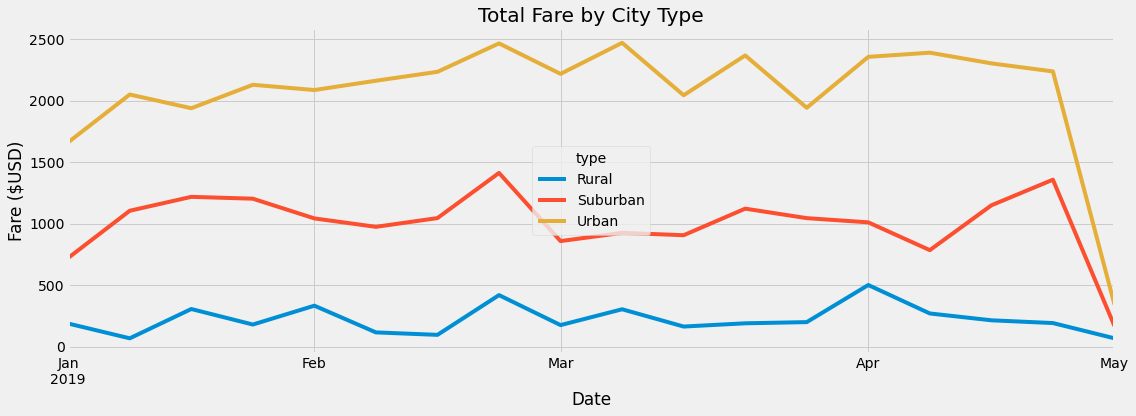

In [107]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fare = weekly_fare_by_type.plot (figsize = (16,6))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_fare.set_title ("Total Fare by City Type")
weekly_fare.set_xlabel( "Date")
weekly_fare.set_ylabel ("Fare ($USD)")
#lgnd = plt.legend(fontsize="8", mode="Expanded",
#         scatterpoints=1, loc="best", title="City Types")
#lgnd.get_title().set_fontsize(8)
plt.tight_layout()
#Save chart
plt.savefig("Analysis/PyBer_fare_summary.png")
plt.show